Epoch 1/20
20/20 [==============================] - 3s 48ms/step - loss: 0.3273 - val_loss: 0.0901
Epoch 2/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0286 - val_loss: 0.0145
Epoch 3/20
20/20 [==============================] - 0s 8ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 4/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0142 - val_loss: 0.0102
Epoch 5/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0136 - val_loss: 0.0114
Epoch 6/20
20/20 [==============================] - 0s 10ms/step - loss: 0.0135 - val_loss: 0.0107
Epoch 7/20
20/20 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.0116
Epoch 8/20
20/20 [==============================] - 0s 10ms/step - loss: 0.0135 - val_loss: 0.0106
Epoch 9/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0134 - val_loss: 0.0117
Epoch 10/20
20/20 [==============================] - 0s 10ms/step - loss: 0.0134 - val_loss: 0.0107
Epoch 11/20
2

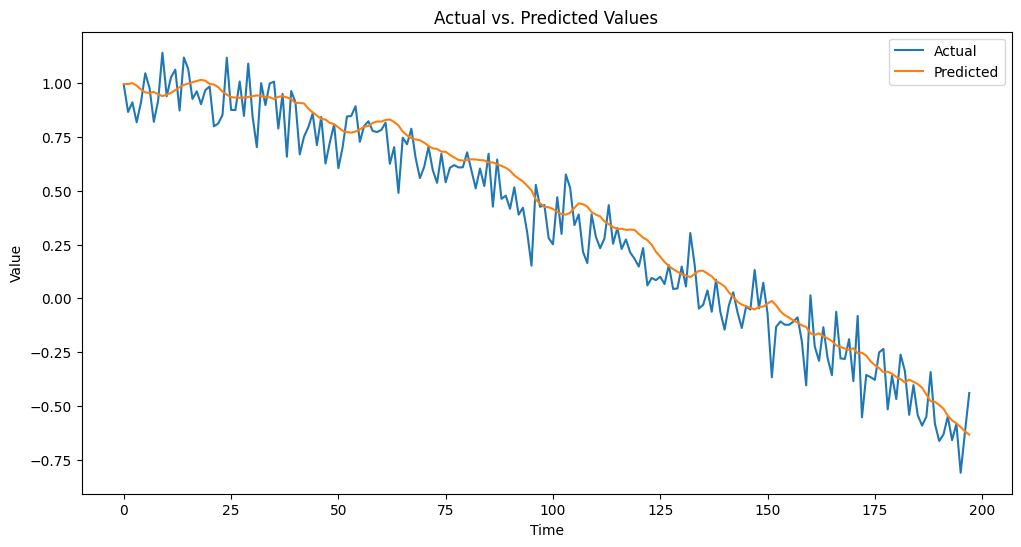

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
def generate_time_series_data(num_points):
 t = np.linspace(0, 10, num_points)
 data = np.sin(t) + 0.1 * np.random.randn(num_points)
 return data
num_points = 1000
data = generate_time_series_data(num_points)
sequence_length = 10
X = []
y = []
for i in range(num_points - sequence_length):
 X.append(data[i:i+sequence_length])
 y.append(data[i+sequence_length])
X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)
train_ratio = 0.8
train_size = int(train_ratio * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
validation_split=0.2)
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
predictions = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()